<a href="https://colab.research.google.com/github/LuisRDG09/EDPT2/blob/main/Ejercicio_2T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolver:

$\frac{\partial ^{2}u}{\partial x^{2}}=\frac{\partial ^{2}u}{\partial y^{2}}$

Con las condiciones de frontera: 

$u(x,0)=u(x,1)=0; u(0,y)=10y, \frac{\partial u(1,x)}{\partial x}=-1$

La solucion es: 

$u(x,y)=\sum_{n=1}^{\infty }\left [ \left [ \frac{-20(-1)^{n}}{n\pi }\right ]cosh(n\pi x)+\left [ \frac{-2}{cosh(n\pi )}\left [ \frac{1-(-1)^{n}}{n^{2}\pi ^{2}} \right ]+\frac{20(-1)^{n}}{n\pi }\left [ \frac{senh(n\pi )}{cosh(n\pi )} \right ] \right ]senh(n\pi x) \right ]sen(n\pi y)$


In [32]:
from pylab import *

In [39]:
def u_xy(x,y,N=30):
    f=zeros((len(x),len(y)))
    for i in range(len(y)):
      for n in range (1,N):
        a=(-20*((-1)**n))/(n*pi)
        c=(-2/cosh(n*pi))*((1-(-1)**n)/n**2*pi**2)
        b=(sinh(n*pi)/cosh(n*pi))
        f[:,i] += sin(n*pi*y)*((a*cosh(n*pi*x))+(c-a*b)*sinh(n*pi*x))
    return f

In [40]:
x = linspace(0,1,1000)
y = linspace(0,1,1000)
U = u_xy(x,y)

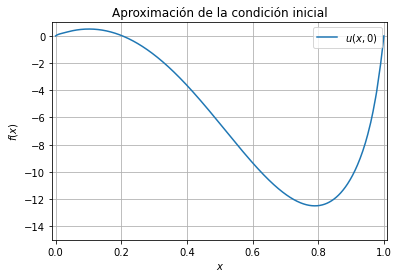

In [41]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-15,1.0]),grid(),legend()
show()

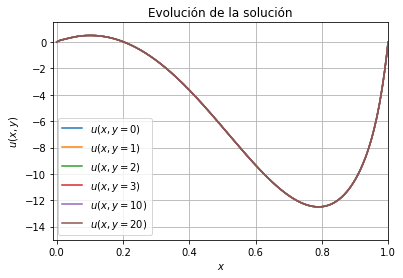

In [36]:
plot(x,U[:,0],label='$u(x,y=0)$') 
plot(x,U[:,1],label='$u(x,y=1)$')
plot(x,U[:,2],label='$u(x,y=2)$')
plot(x,U[:,3],label='$u(x,y=3)$')
plot(x,U[:,10],label='$u(x,y=10)$')
plot(x,U[:,20],label='$u(x,y=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1]),ylim([-15.0,1.5]),grid(),legend()
show()

En una grafica 3D.

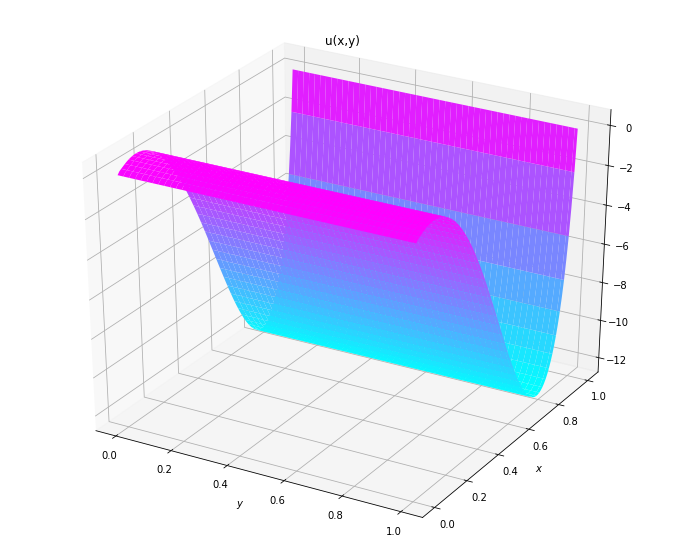

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_xy(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="cool")